# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [4]:
#Your code here
df.columns = df.columns.str.lower()

# Change the Index to be the Line Names

In [5]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [6]:
# Your code here
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [7]:
# Your code here
line_count = dict()
for row in df.station:
    if row in line_count:
        line_count[row] += 1
    else:
        line_count[row] = 1
num_lines = list()
for x in line_count:
    lines = line_count[x]
    line = x
    counter = line_count[x]
    while counter > 0:
        num_lines.append(line_count[x])
        counter -= 1
df['num_lines'] = num_lines
df.set_index('num_lines')
df.sort_index(ascending=False)


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,21:00:00,REGULAR,5554,348,252
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348,252
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348,252
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348,252
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348,252
197619,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,01:00:00,REGULAR,5554,348,252
197618,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,21:00:00,REGULAR,5554,348,252
197617,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,17:00:00,REGULAR,5554,348,252
197616,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,13:00:00,REGULAR,5554,348,252
197615,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/30/2018,09:00:00,REGULAR,5554,348,252


## Write a function to clean a column name.

In [8]:
def clean(col_name):
    cleaned = col_name.title()

    return cleaned

In [9]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [13]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

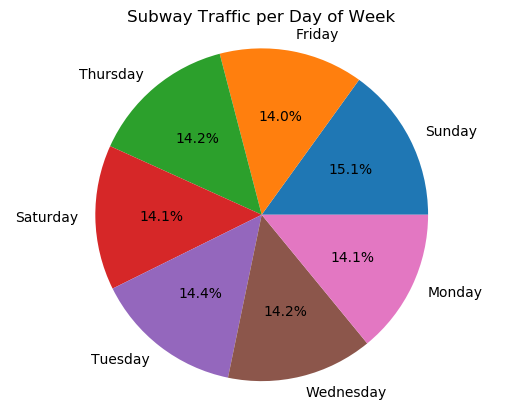

In [35]:
#Your code here
day_of_week = list(pd.to_datetime(df['Date']).dt.day_name())
entries = list(df['Entries'])
traffic = {
    'Sunday': 0,
    'Monday': 0,
    'Tuesday': 0,
    'Wednesday': 0,
    'Thursday': 0,
    'Friday': 0,
    'Saturday': 0
}
x = 0
for day in day_of_week:
    traffic[day] += entries[x]
    x += 1

import matplotlib.pyplot as plt
 
# Data to plot
labels = traffic.keys()
 
# Plot
plt.pie(list(traffic.values()), labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.title('Subway Traffic per Day of Week')
plt.show()


## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [44]:
#Your code here
weekend = int()
weekday = int()
for t in traffic:
    if t == 'Saturday' or t == 'Sunday':
        weekend += traffic[t]
    else:
        weekday += traffic[t]
weekday_avg = weekday/5
weekend_avg = weekend/2

difference = weekend_avg - weekday_avg
percent_dif = difference / weekday_avg * 100

print(percent_dif)

# There is about a 2.8% increase in subway traffic on the weekend


2.774506254260931


# Drop a couple of columns

In [45]:
# Your code here
df = df.drop(['Unit', 'Division'], axis=1)
df

,Linename,C/A,Scp,Station,Date,Time,Desc,Entries,Exits,Num_Lines
0,NQR456W,A002,02-00-00,59 ST,08/25/2018,00:00:00,REGULAR,6736067,2283184,123
1,NQR456W,A002,02-00-00,59 ST,08/25/2018,04:00:00,REGULAR,6736087,2283188,123
2,NQR456W,A002,02-00-00,59 ST,08/25/2018,08:00:00,REGULAR,6736105,2283229,123
3,NQR456W,A002,02-00-00,59 ST,08/25/2018,12:00:00,REGULAR,6736180,2283314,123
4,NQR456W,A002,02-00-00,59 ST,08/25/2018,16:00:00,REGULAR,6736349,2283384,123
5,NQR456W,A002,02-00-00,59 ST,08/25/2018,20:00:00,REGULAR,6736562,2283425,123
6,NQR456W,A002,02-00-00,59 ST,08/26/2018,00:00:00,REGULAR,6736683,2283460,123
7,NQR456W,A002,02-00-00,59 ST,08/26/2018,04:00:00,REGULAR,6736696,2283461,123
8,NQR456W,A002,02-00-00,59 ST,08/26/2018,08:00:00,REGULAR,6736705,2283483,123
9,NQR456W,A002,02-00-00,59 ST,08/26/2018,12:00:00,REGULAR,6736746,2283524,123
